<a href="https://colab.research.google.com/github/SnehaPrasanna1/SnehaPrasannaAI/blob/main/SimulatedAnnealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best state (Queen positions): [3, 6, 0, 7, 4, 1, 5, 2], Number of conflicts: 0


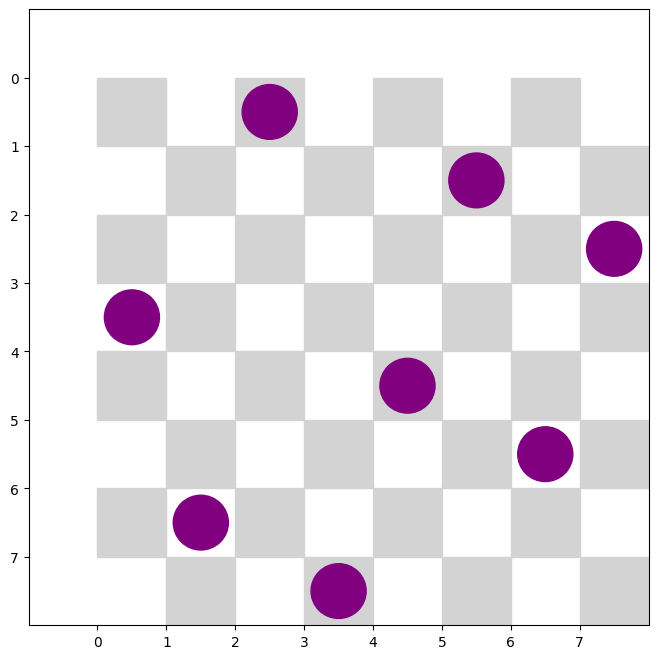

In [10]:
import random
import math
import matplotlib.pyplot as plt

# Generate an initial solution with unique columns for each queen
def create_initial_solution(n):
    return random.sample(range(n), n)  # A permutation of column indices (unique columns)

# Calculate the number of diagonal conflicts
def calculate_fitness(state):
    diagonal_conflicts = 0
    n = len(state)

    for i in range(n):
        for j in range(i + 1, n):
            if abs(state[i] - state[j]) == abs(i - j):  # Check if they are on the same diagonal
                diagonal_conflicts += 1

    return diagonal_conflicts

# Generate a neighboring solution by swapping two columns
def random_neighbor(state):
    neighbor = state[:]
    i, j = random.sample(range(len(state)), 2)  # Pick two different rows to swap
    neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
    return neighbor

# Simulated Annealing Algorithm
def simulated_annealing(n, initial_temp=1000, cooling_rate=0.95, max_iterations=1000):
    current_solution = create_initial_solution(n)
    current_fitness = calculate_fitness(current_solution)
    best_solution = current_solution
    best_fitness = current_fitness
    temperature = initial_temp

    for iteration in range(max_iterations):
        neighbor = random_neighbor(current_solution)
        neighbor_fitness = calculate_fitness(neighbor)

        fitness_diff = neighbor_fitness - current_fitness

        # Accept the neighbor if it improves the solution or based on the annealing probability
        if fitness_diff < 0 or random.uniform(0, 1) < math.exp(-fitness_diff / temperature):
            current_solution = neighbor
            current_fitness = neighbor_fitness

            # Update the best solution if the current one is better
            if current_fitness < best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness

        # Cool down the temperature
        temperature *= cooling_rate

    return best_solution, best_fitness

# Visualize the chessboard and queens
def plot_solution(solution):
    n = len(solution)
    plt.figure(figsize=(n, n))
    plt.xlim(-1, n)
    plt.ylim(-1, n)

    # Draw the chessboard
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color='lightgrey'))

    # Place the queens
    for col, row in enumerate(solution):
        plt.gca().add_patch(plt.Circle((col + 0.5, row + 0.5), 0.4, color='purple'))

    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.show()

# Parameters
n = 8  # Number of queens
best_solution, best_fitness = simulated_annealing(n)

# Output results
print(f"Best state (Queen positions): {best_solution}, Number of conflicts: {best_fitness}")

# Plot the solution
plot_solution(best_solution)
